## Reading Data

In [122]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#statmodel libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [123]:
#supress warnings

import warnings
warnings.filterwarnings("ignore")

In [124]:
df = pd.read_csv('Leads.csv')
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
pd.set_option("display.width", None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [125]:
# Checking the shape of the data
df.shape

(9240, 37)

In [126]:
# describing the data

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [127]:
#checking unique number of values in each column

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [128]:
# Checking the info of data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Cleaning Data

In [129]:
# Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [130]:
# Calculating Missing Values Percentage

100*(df.isna().mean()).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [131]:
# Droping the null values which are greater than 40%
df=df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'],axis =1)

In [132]:
df.shape

(9240, 30)

In [133]:
# Recalculating Missing Values Percentage

100*(df.isna().mean()).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [134]:
#create a function to check the value count
def print_column_value_counts(dataframe, columns):
    for column in columns:
        value_counts = dataframe[column].value_counts()
        print(f"Value counts for {column}:")
        print(value_counts)
        print()
        print("*" * 100)
        print()
# Specifying the columns you want to print value counts for
columns_to_check = ["City","Specialization","Tags",'What matters most to you in choosing a course',
                    'What is your current occupation','Country','Last Activity','Lead Source',
                    'TotalVisits','Page Views Per Visit']

# Call the function with the dataframe and the columns
print_column_value_counts(df, columns_to_check)

Value counts for City:
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

****************************************************************************************************

Value counts for Specialization:
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management         

In [135]:
df['Lead Source'] = df['Lead Source'].replace(
                                    ["bing","Click2call","Press_Release","Social Media","Live Chat",
                                     "youtubechannel","testone","Pay per Click Ads","welearnblog_Home",
                                     "WeLearn","blog","NC_EDM"],"Others")
df['Last Activity'] = df['Last Activity'].replace(
                                                    ['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                     'Approached upfront','View in browser link Clicked',       
                                                     'Email Marked Spam', 'Email Received','Visited Booth in Tradeshow',
                                                      'Resubscribed to emails'],'Others')

In [136]:
# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [137]:
# dropping the column of no use
df.drop(['City','Tags','What matters most to you in choosing a course','Country'],axis=1,inplace=True)


In [138]:
# Imputing values
df['Specialization']=df['Specialization'].replace(np.nan,'Others')
df['Lead Source']=df['Lead Source'].replace(np.nan,'Others')
df['Last Activity']=df['Last Activity'].replace(np.nan,'Others')
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Others')

In [139]:
# Dropping the rows with null values
df.dropna(inplace = True)

In [140]:
# Recalculating Missing Values Percentage

100*(df.isna().mean()).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [141]:
# Removing Unwanted Columns

df.drop(['Prospect ID','Lead Number','Last Notable Activity','Magazine','Receive More Updates About Our Courses',
                'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Last Notable Activity'],axis = 1, inplace = True)

In [142]:
df.shape

(9103, 18)

### Visualising the Data

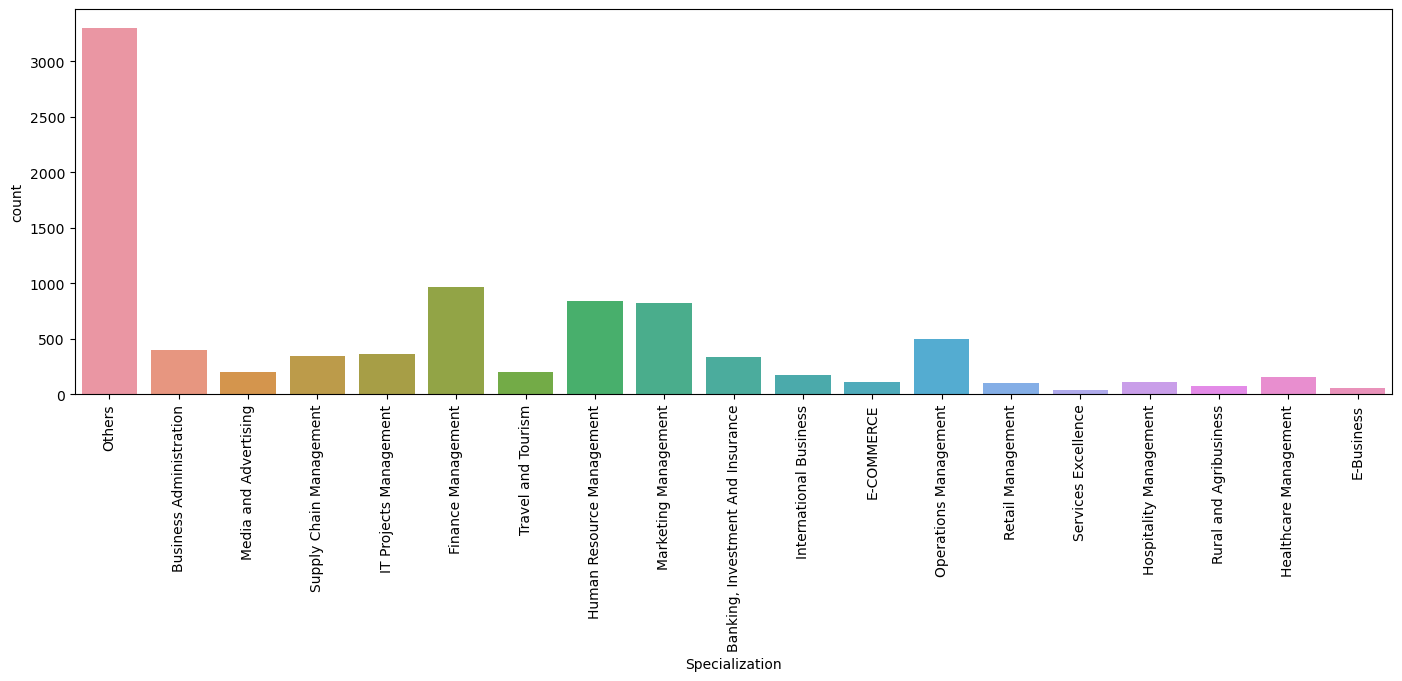

In [143]:
# Plot countplot for Specialization
plt.figure(figsize=(17,5))
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)
plt.show()

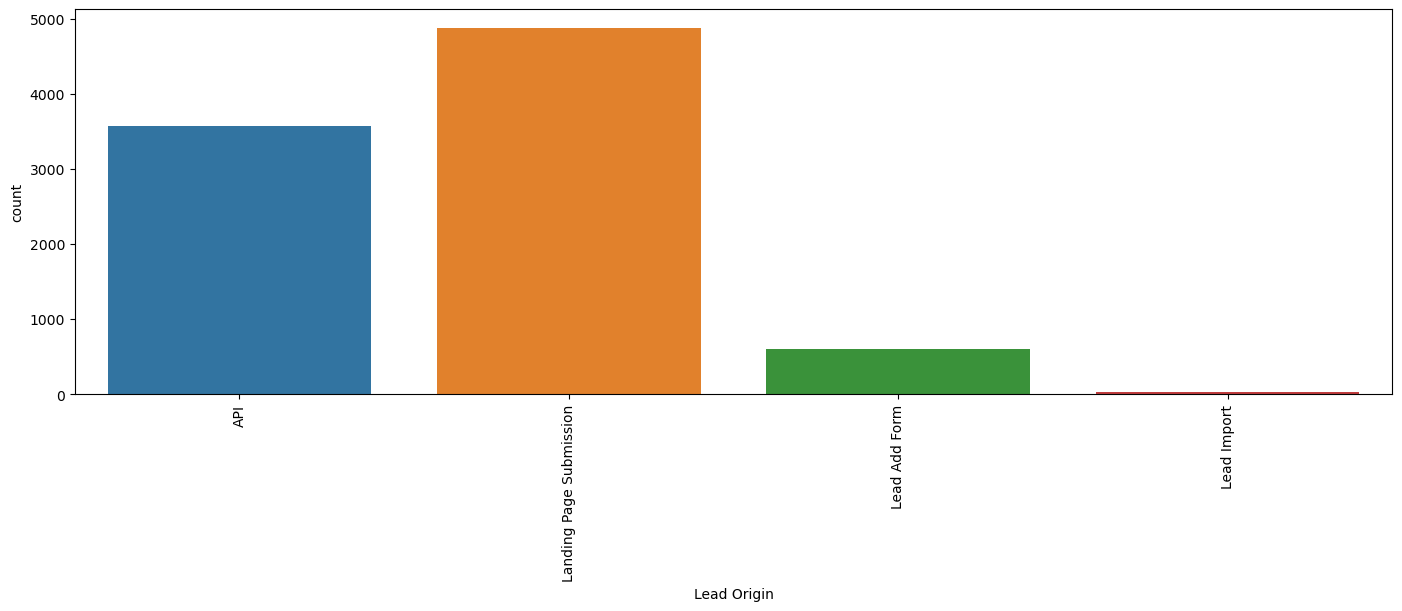

In [144]:
plt.figure(figsize=(17,5))
sns.countplot(df['Lead Origin'])
plt.xticks(rotation=90)
plt.show()

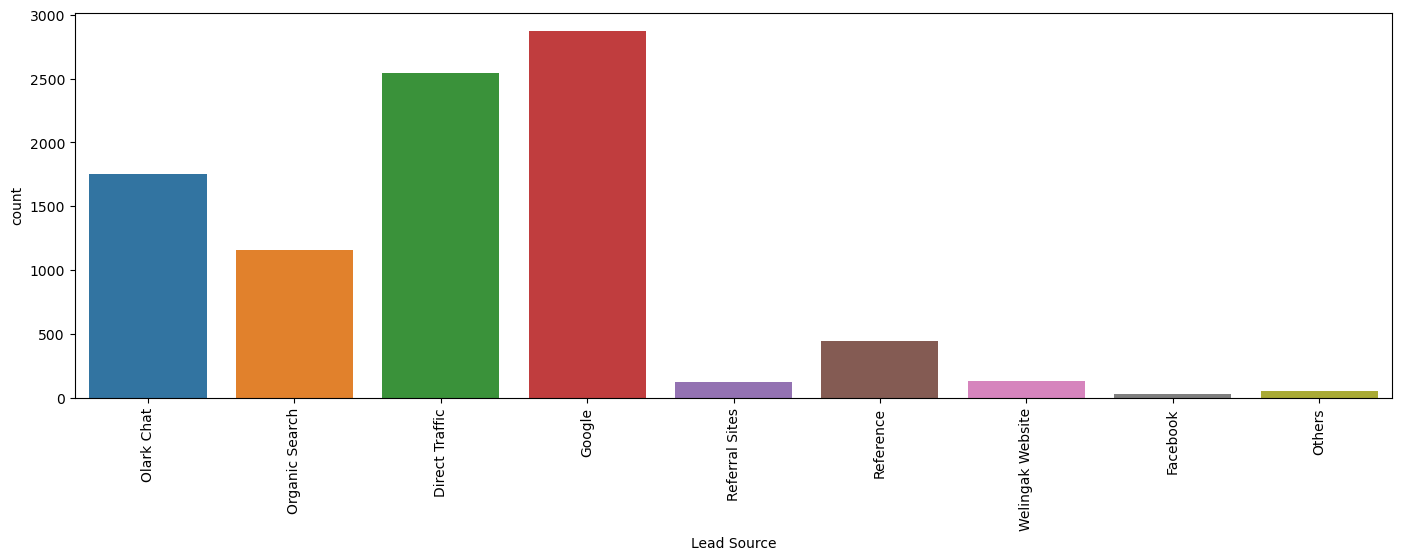

In [145]:
# Plot countplot for Lead source
plt.figure(figsize=(17,5))
sns.countplot(df['Lead Source'])
plt.xticks(rotation=90)
plt.show()

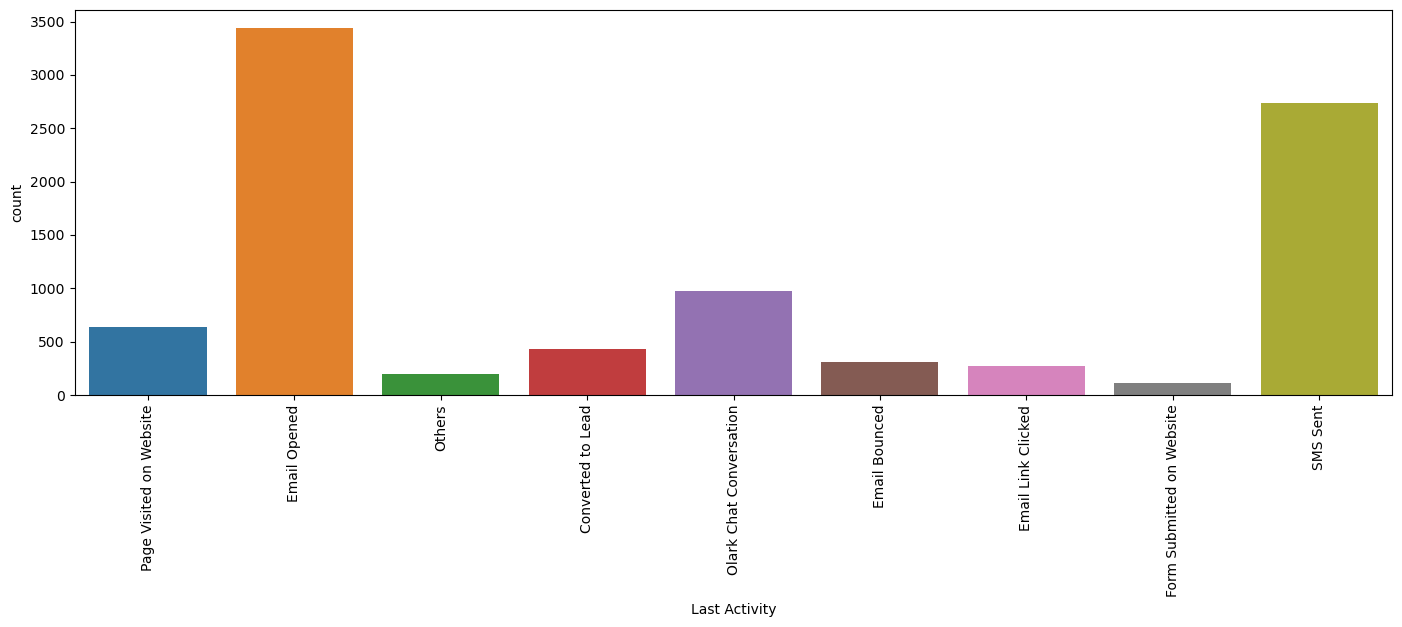

In [146]:
# Plot countplot for Last Activity
plt.figure(figsize=(17,5))
sns.countplot(df['Last Activity'])
plt.xticks(rotation=90)
plt.show()

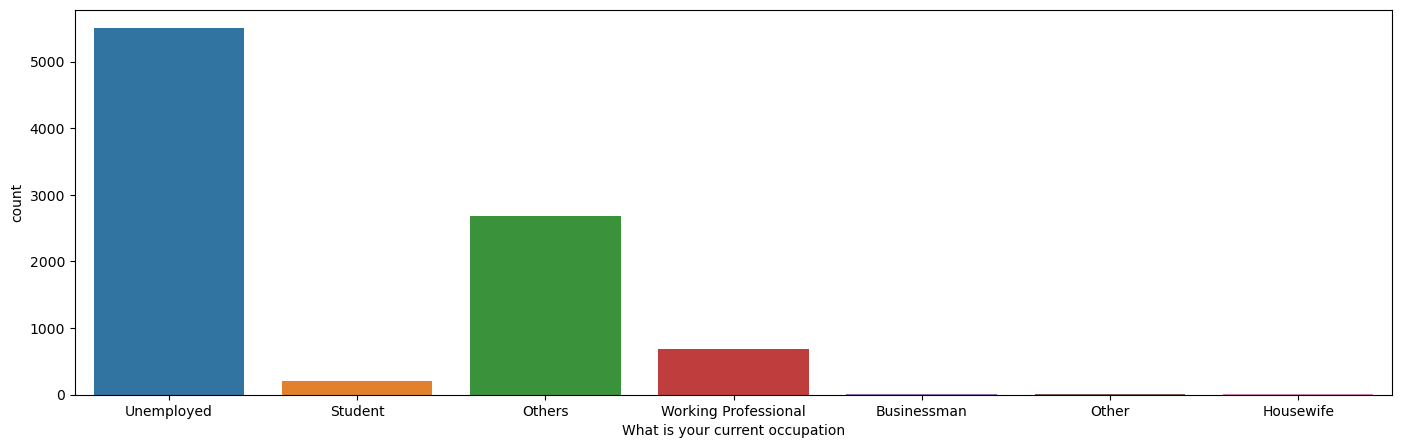

In [147]:
# Plot the count plot for "What is your current occupation"
plt.figure(figsize=(17,5))
sns.countplot(df['What is your current occupation'])
plt.show()           

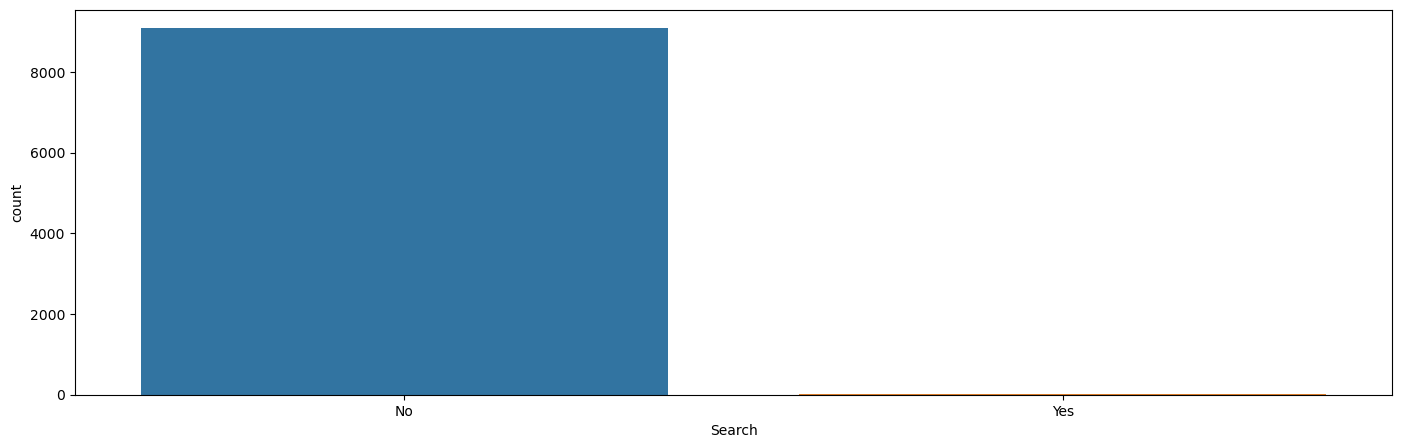

In [148]:
# Plot the count plot for "Search"
plt.figure(figsize=(17,5))
sns.countplot(df['Search'])
plt.show()    

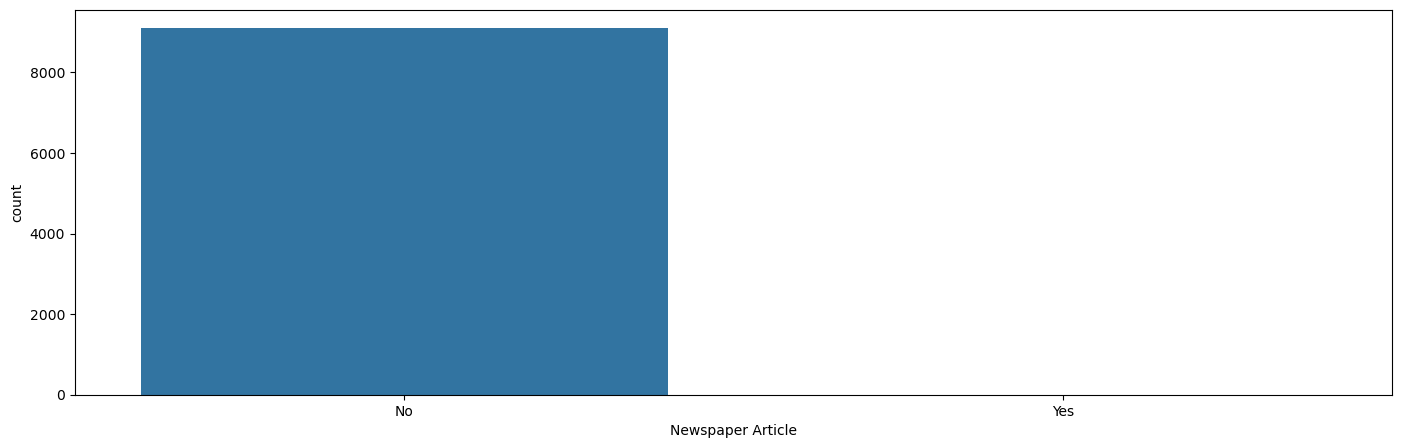

In [149]:
# Plot the count plot for "Newspaper Article"
plt.figure(figsize=(17,5))
sns.countplot(df['Newspaper Article'])
plt.show()       

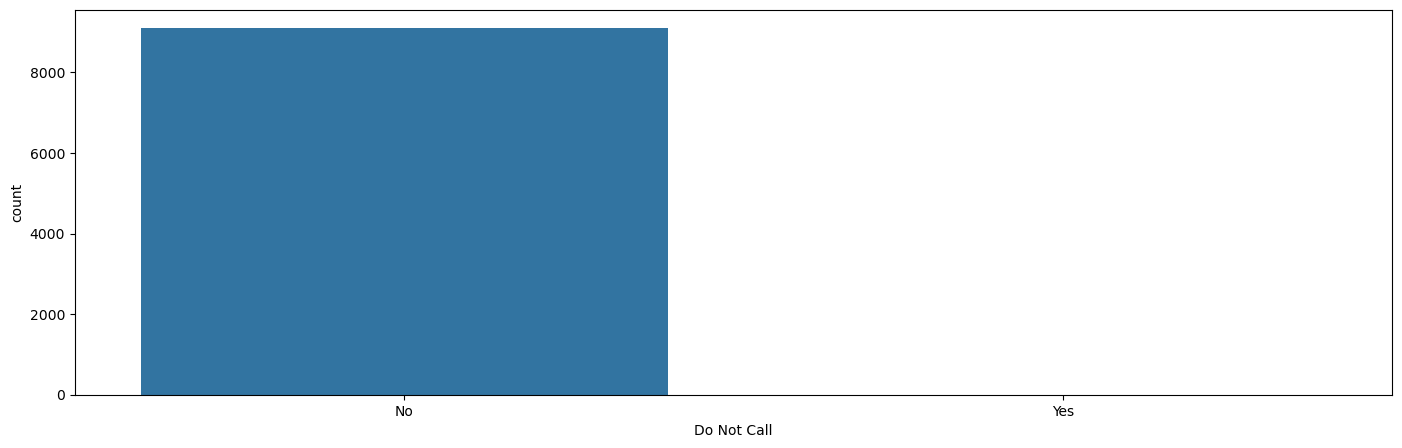

In [150]:
# Plot the count plot for 'Do Not Call'
plt.figure(figsize=(17,5))
sns.countplot(df['Do Not Call'])
plt.show()     

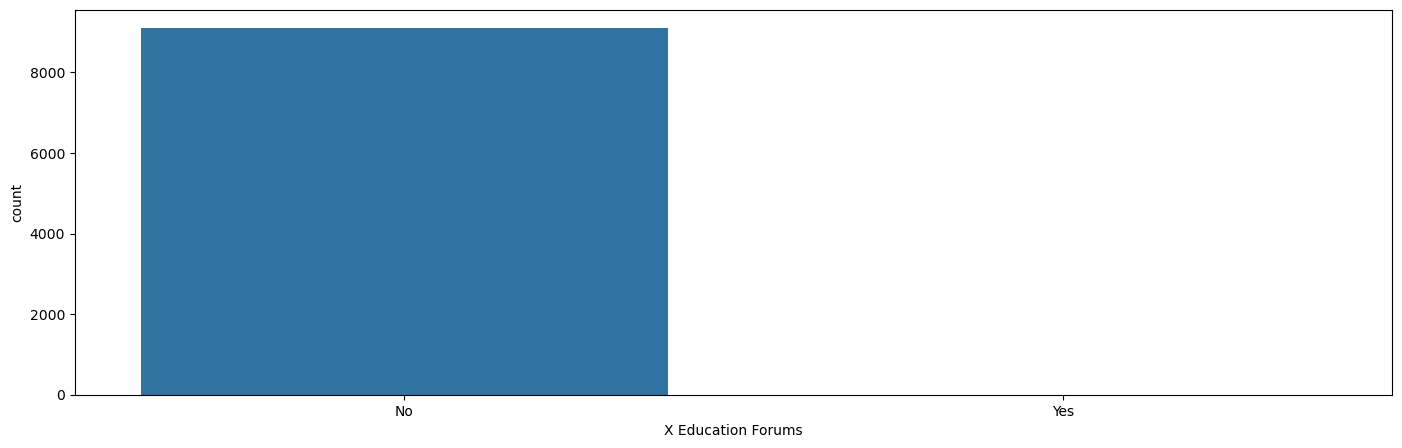

In [151]:
# Plot the count plot for "X Education Forums"
plt.figure(figsize=(17,5))
sns.countplot(df['X Education Forums'])
plt.show()       

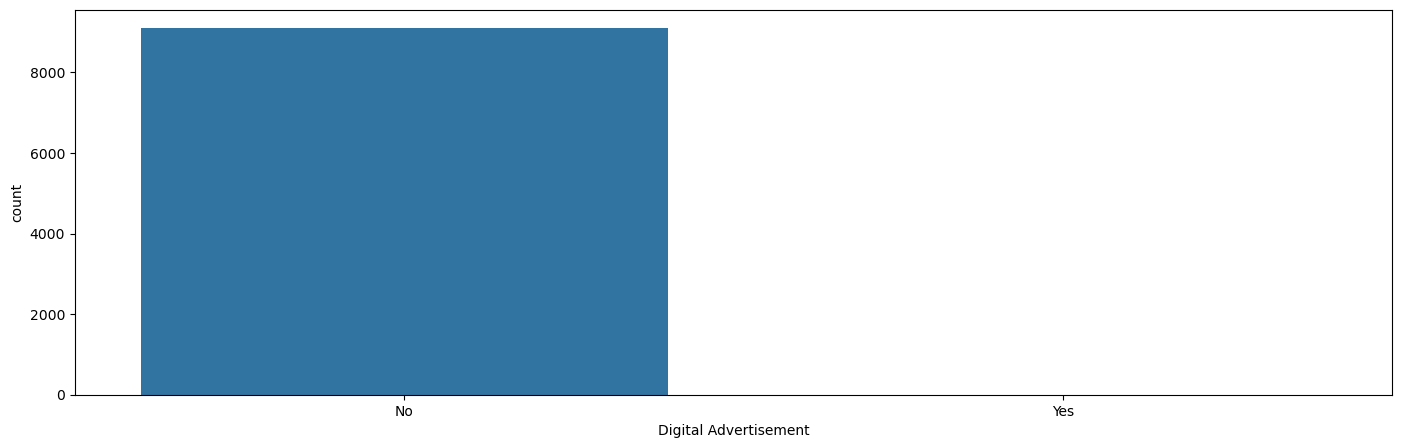

In [152]:
# Plot the count plot for "Digital Advertisement"
plt.figure(figsize=(17,5))
sns.countplot(df['Digital Advertisement'])
plt.show()       

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [154]:
# Removing Unwanted Columns(highly asymmetric)

df.drop(['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','A free copy of Mastering The Interview'],axis = 1, inplace = True)

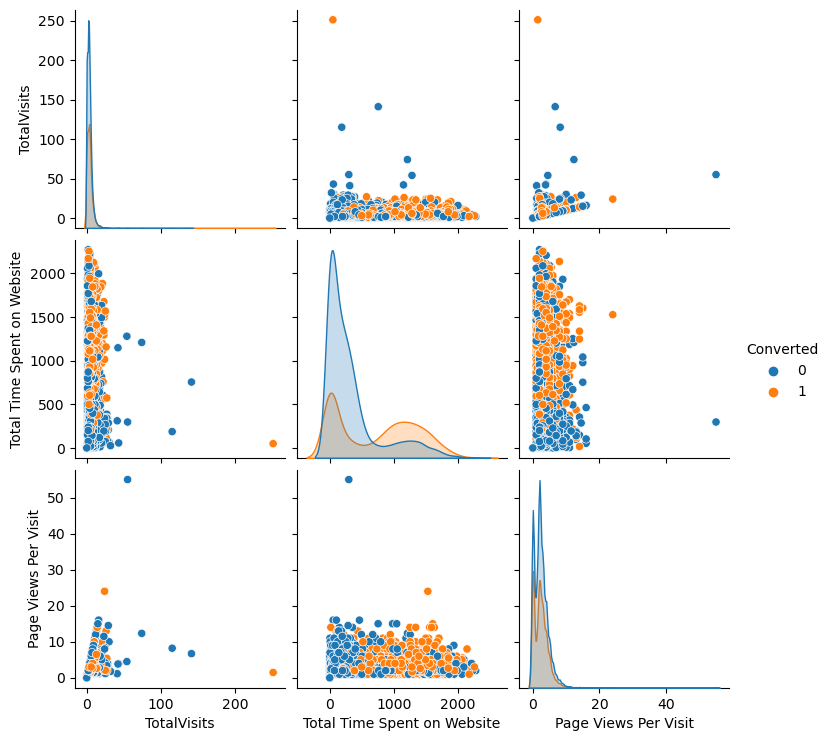

In [155]:
ad = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(ad,diag_kind='kde',hue='Converted')
plt.show()

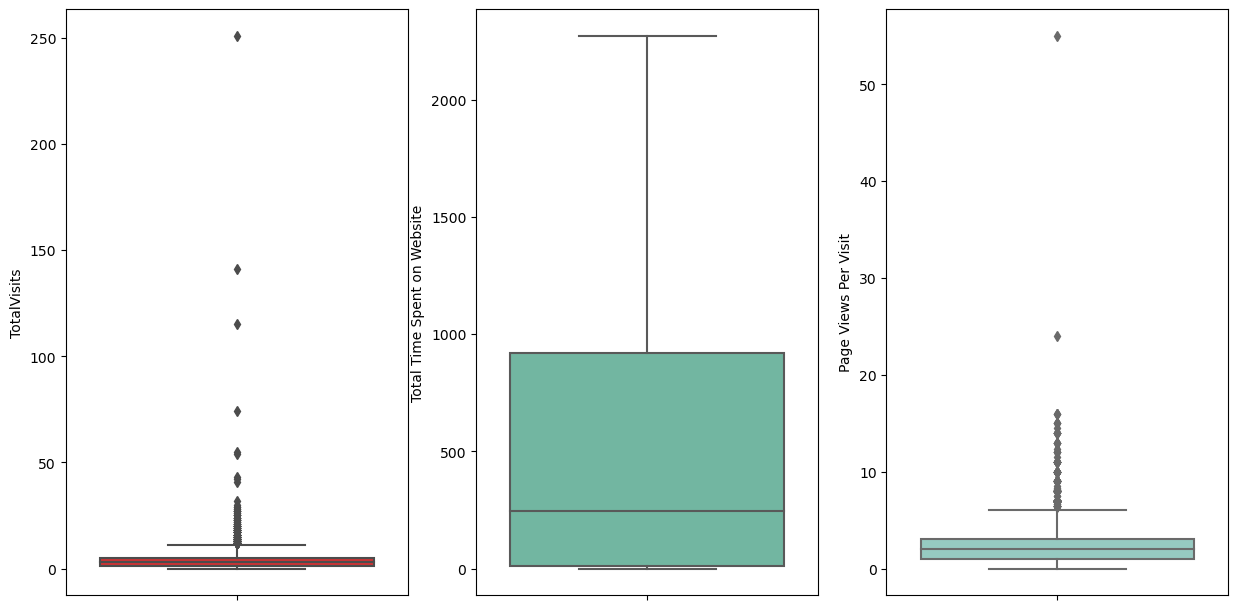

In [156]:
# Checking outliers for numerical variables 

plt.figure(figsize=(15,35))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set1', data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = df)
plt.show()

In [157]:
# Removing values beyond 95% for Total Visits

nn_quartile_total_visits = df['TotalVisits'].quantile(0.95)
df = df[df["TotalVisits"] < nn_quartile_total_visits]
df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95])

count    8636.000000
mean        2.813224
std         2.346719
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
90%         6.000000
95%         7.000000
max         9.000000
Name: TotalVisits, dtype: float64

In [158]:
# Removing values beyond 95% for page Views Per Visit

nn_quartile_page_visits = df['Page Views Per Visit'].quantile(0.95)
df = df[df["Page Views Per Visit"] < nn_quartile_page_visits]
df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95])

count    8153.000000
mean        1.937871
std         1.529216
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         4.000000
95%         5.000000
max         5.000000
Name: Page Views Per Visit, dtype: float64

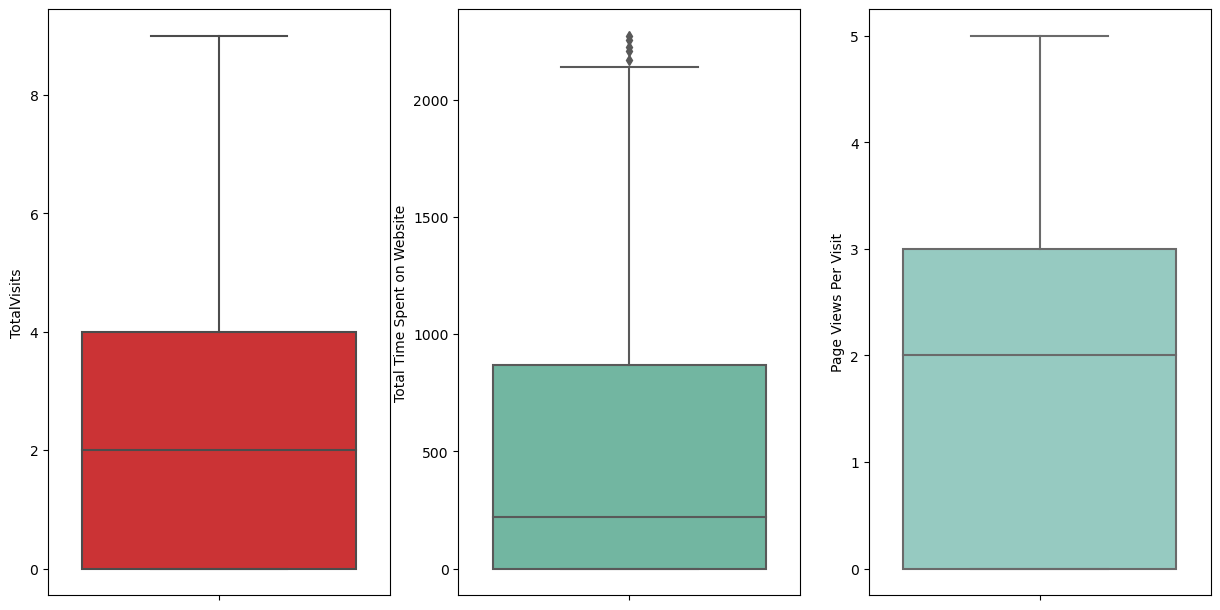

In [159]:
# Rechecking outliers for numerical variables 

plt.figure(figsize=(15,35))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set1', data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = df)
plt.show()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8153 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8153 non-null   object 
 1   Lead Source                      8153 non-null   object 
 2   Do Not Email                     8153 non-null   object 
 3   Do Not Call                      8153 non-null   object 
 4   Converted                        8153 non-null   int64  
 5   TotalVisits                      8153 non-null   float64
 6   Total Time Spent on Website      8153 non-null   int64  
 7   Page Views Per Visit             8153 non-null   float64
 8   Last Activity                    8153 non-null   object 
 9   Specialization                   8153 non-null   object 
 10  What is your current occupation  8153 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 764.3+ KB


In [161]:
# Converting 'Yes': 1, "No": 0
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

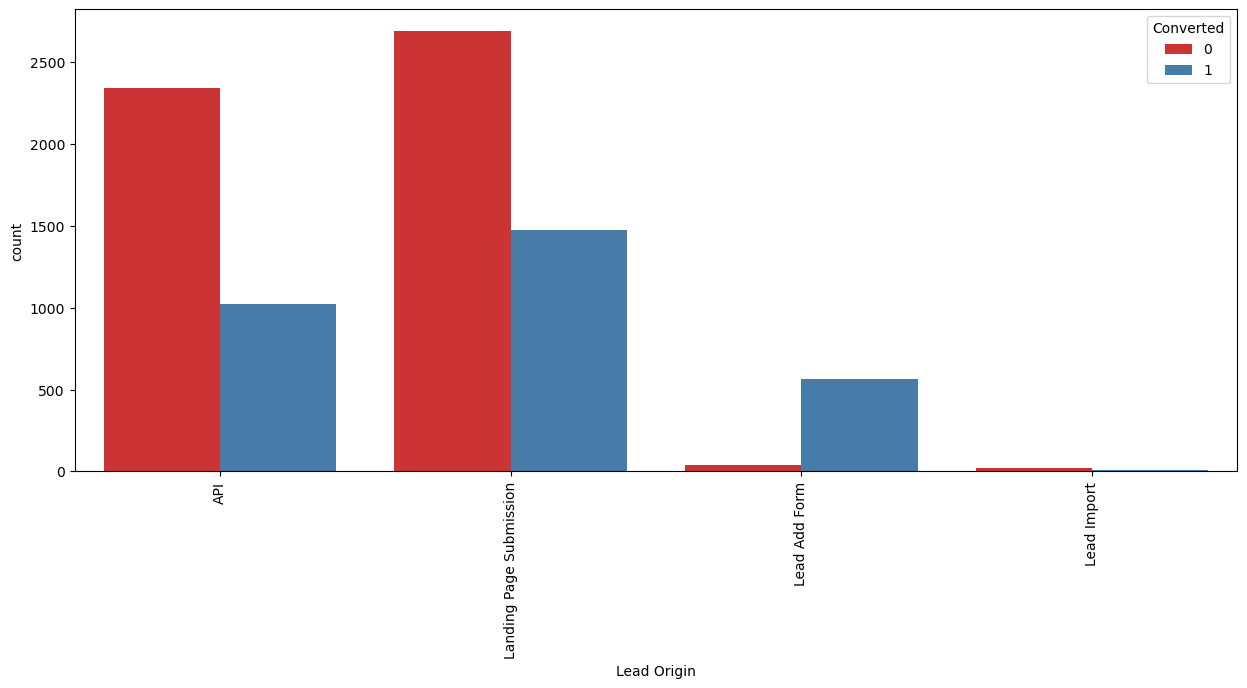

In [162]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

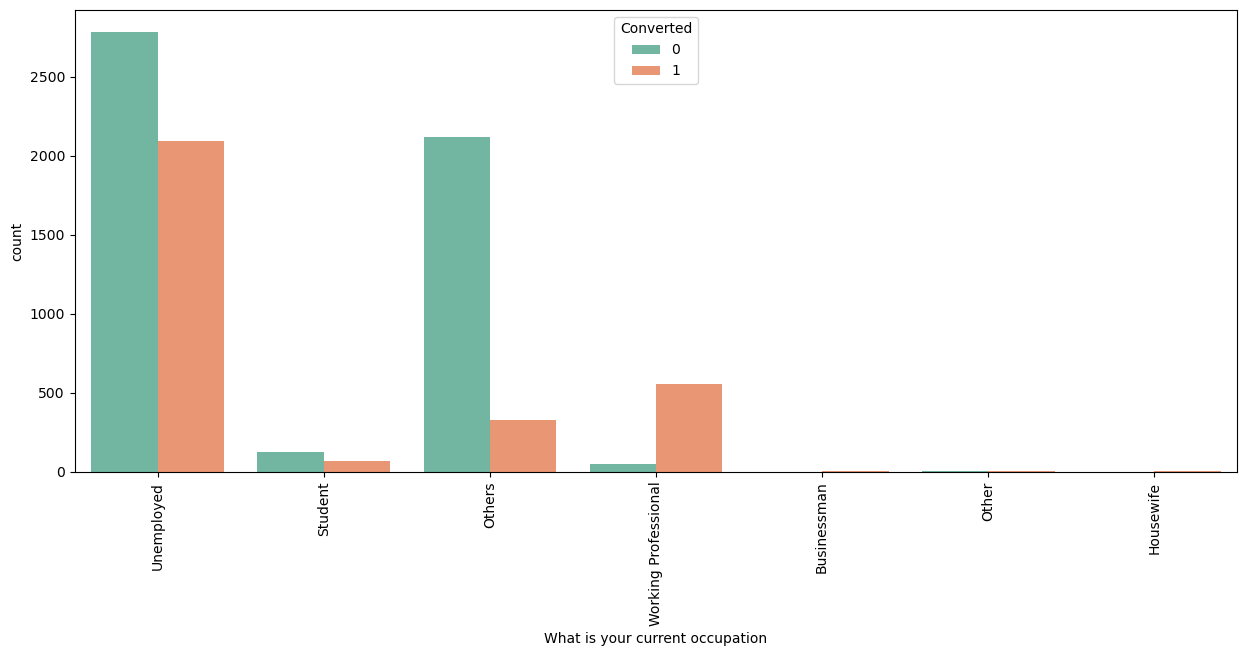

In [163]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

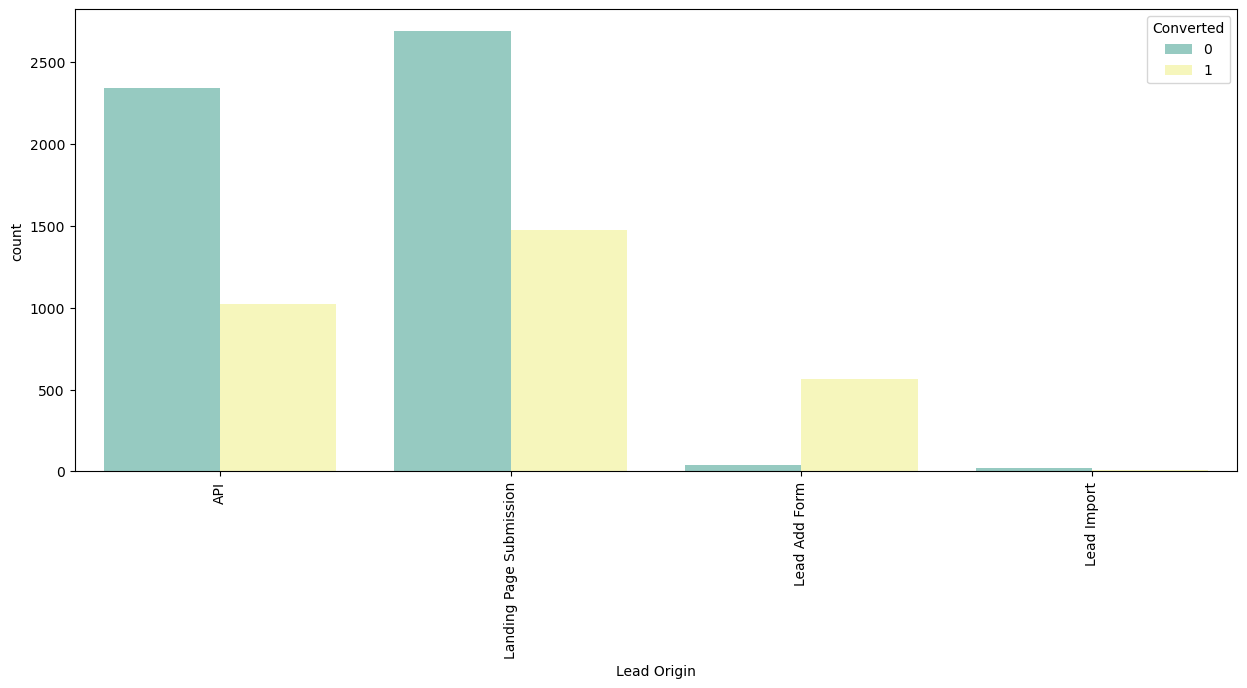

In [164]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df,palette='Set3')
plt.xticks(rotation = 90)
plt.show()

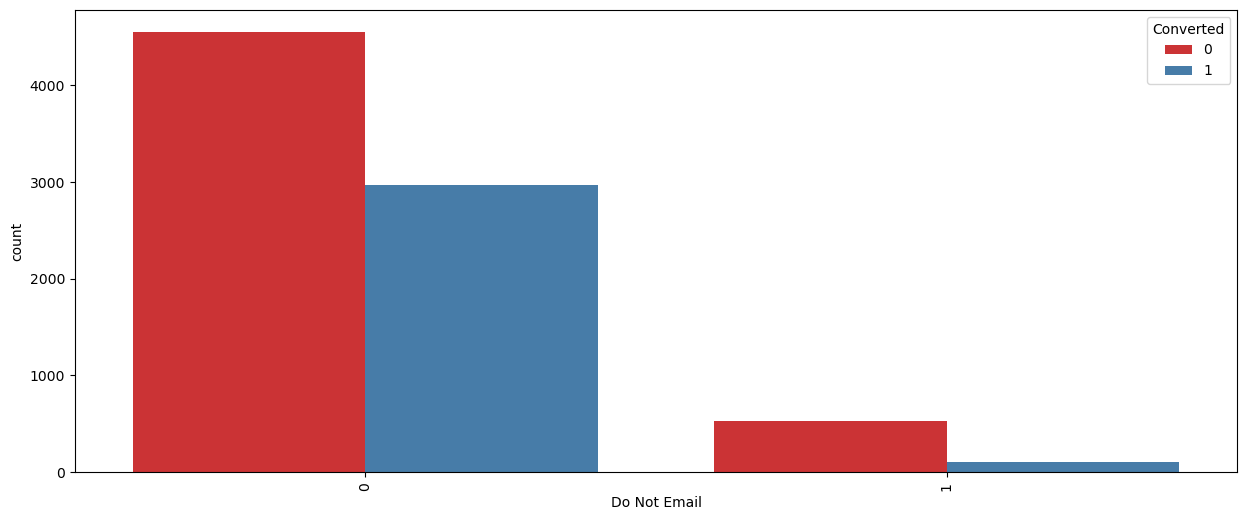

In [165]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

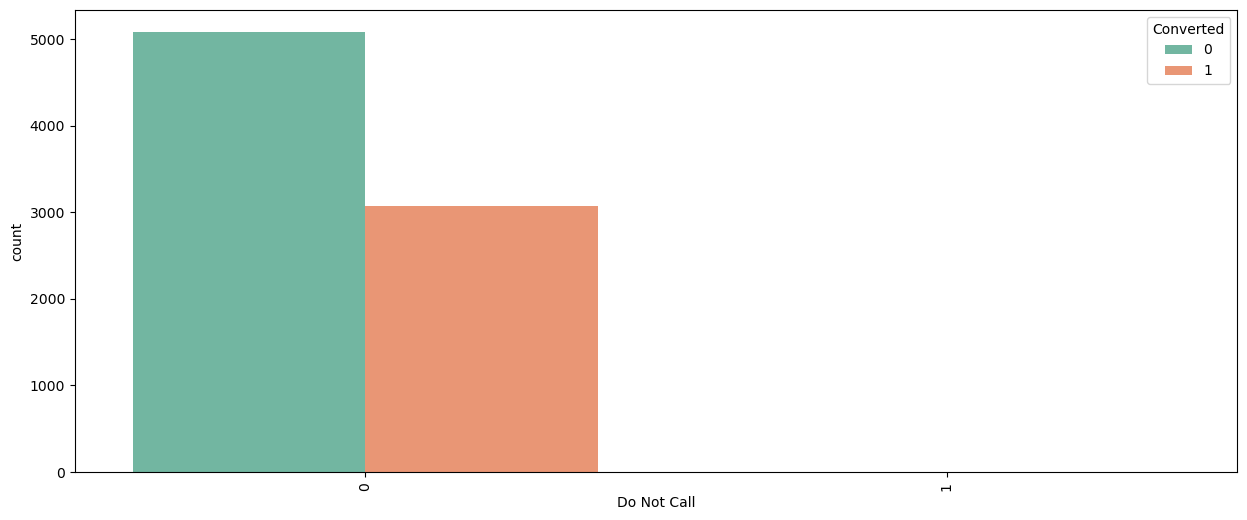

In [166]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Do Not Call", hue = "Converted", data = df,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

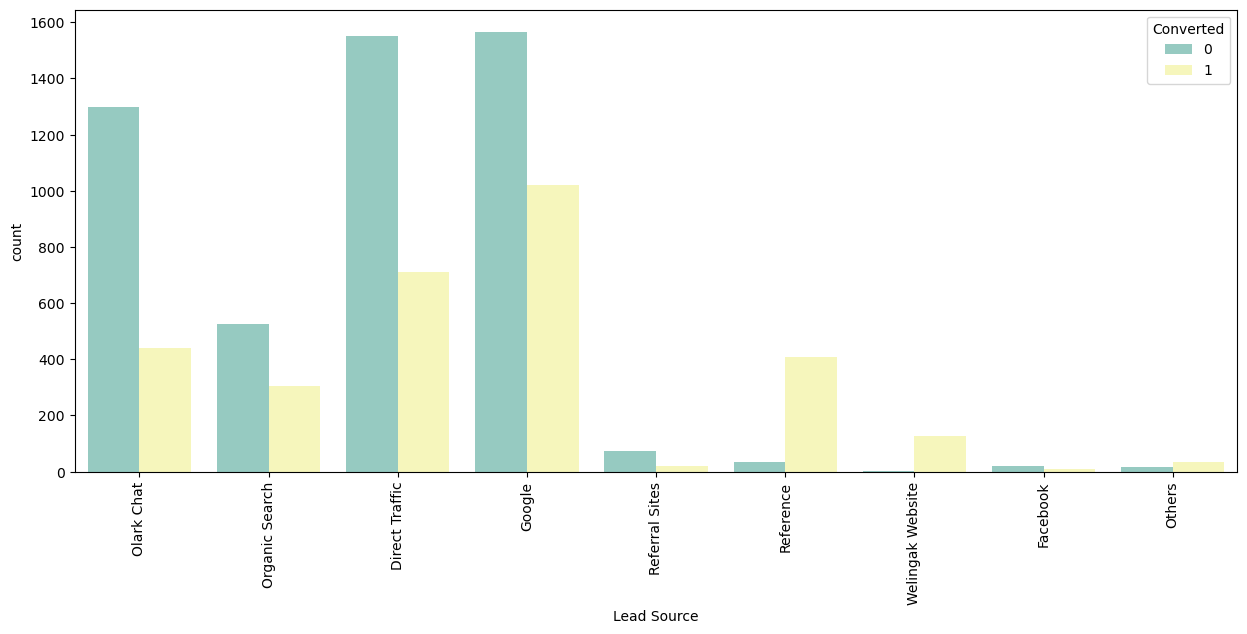

In [167]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set3')
plt.xticks(rotation = 90)
plt.show()

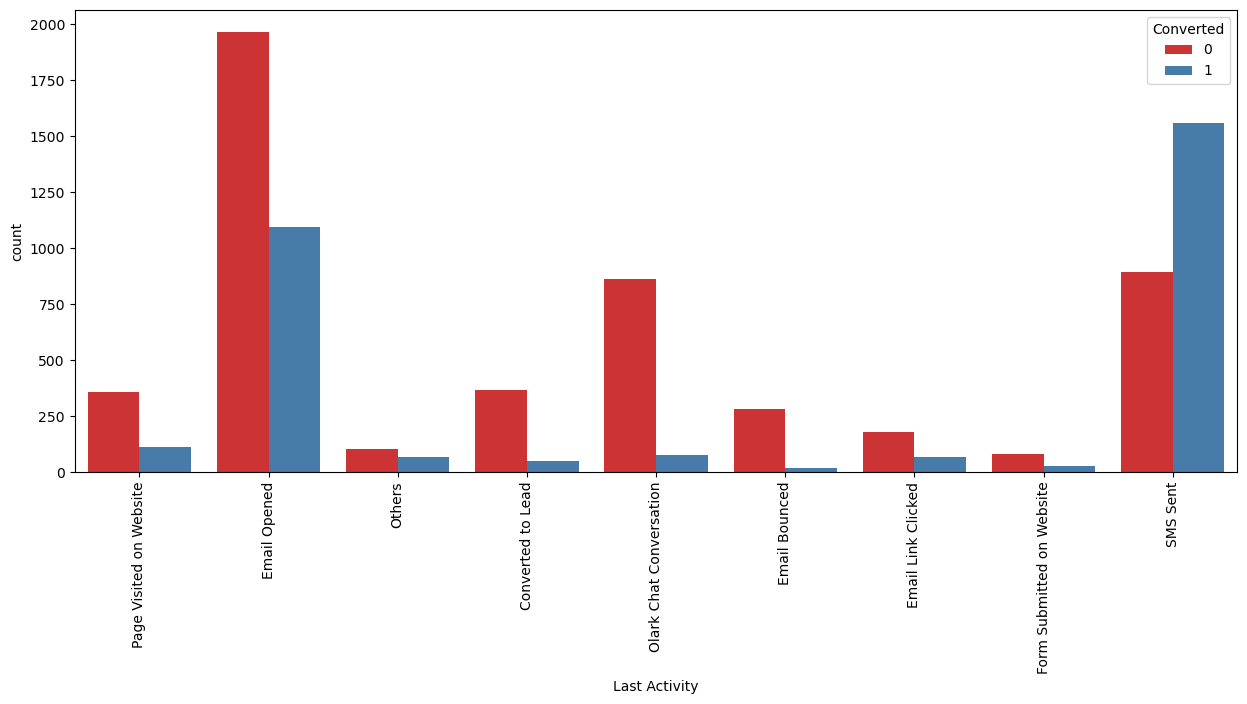

In [168]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

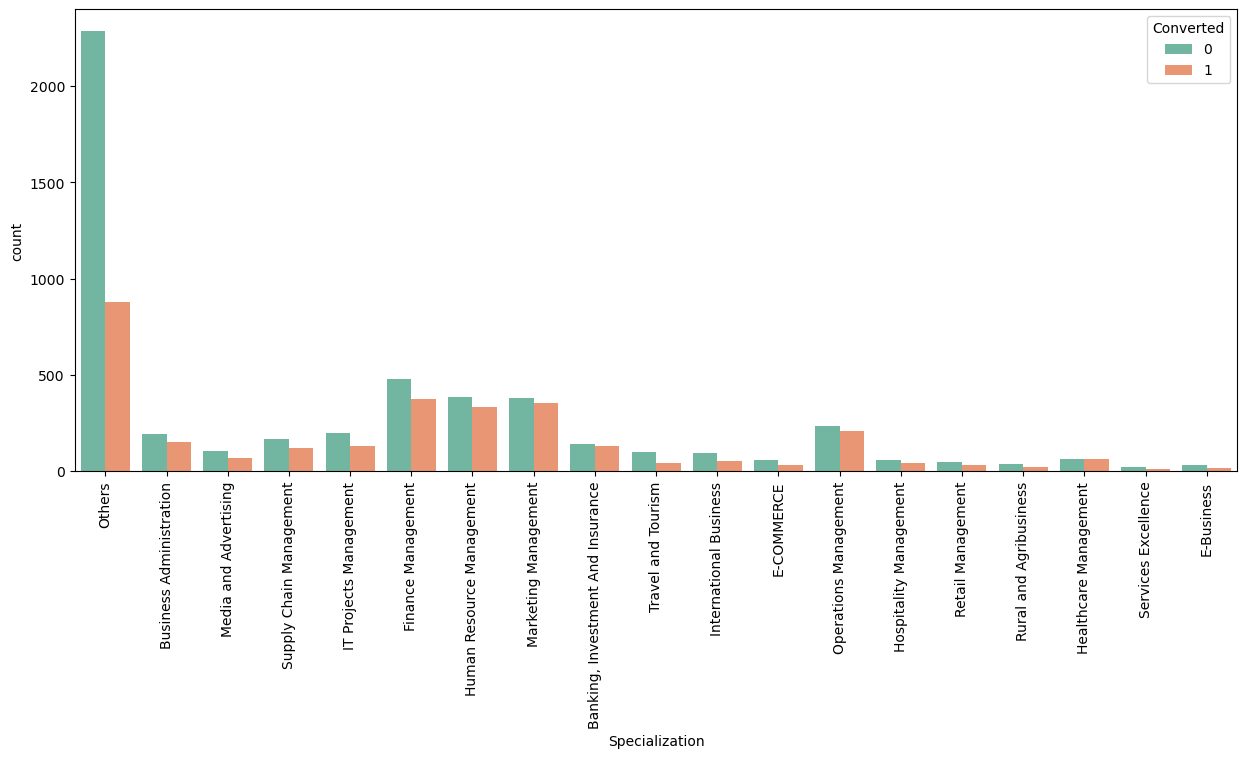

In [169]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = df,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

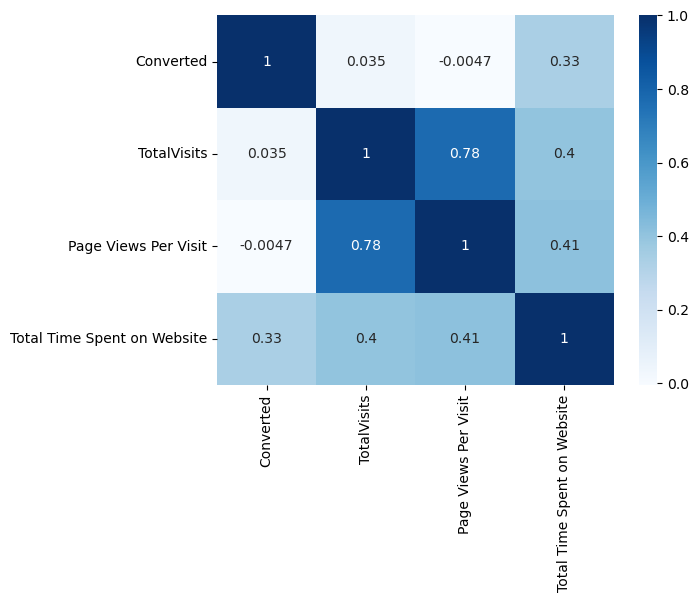

In [170]:
# Heatmap to show correlation between numerical variables

sns.heatmap(data=df[["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].corr(),cmap="Blues",annot=True)
plt.show()

## Dummy Variables

In [171]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [172]:
# Dummy variable creation

dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe

df = pd.concat([df, dummy], axis=1)

In [173]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation'], axis = 1)

In [174]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [175]:
df.shape

(8153, 49)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8153 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8153 non-null   int64  
 1   Do Not Call                                           8153 non-null   int64  
 2   Converted                                             8153 non-null   int64  
 3   TotalVisits                                           8153 non-null   float64
 4   Total Time Spent on Website                           8153 non-null   int64  
 5   Page Views Per Visit                                  8153 non-null   float64
 6   Lead Origin_Landing Page Submission                   8153 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8153 non-null   uint8  
 8   Lead Origin_Lead Import                               8153

## Splitting Data

In [177]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [178]:
# Putting target variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [179]:
# Splitting the data into train and test
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the feature variable

In [180]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2294,0,0,0.222222,0.106514,0.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6004,0,0,0.222222,0.172535,0.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8845,0,0,0.222222,0.172095,0.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2218,0,0,0.333333,0.128081,0.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8275,0,0,0.222222,0.018046,0.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [181]:
# Check the Lead conversion rate
Rate = (sum(df['Converted'])/len(df['Converted'].index))*100
Rate

37.6425855513308

# Model Building

In [182]:
# Feature Selection Using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)


In [183]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', False, 9),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 18),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 22),
 ('Last Activity_SMS Sent', True, 1),
 ('Special

In [184]:
# variables selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

###  Model1

In [185]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()  

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5707
Model:                            GLM   Df Residuals:                     5691
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2237.2
Date:                Sun, 18 Jun 2023   Deviance:                       4474.5
Time:                        21:53:27   Pearson chi2:                 5.36e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4192
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4363      0.176     -8.173      0.000      -1.781      -1.092
Do Not Email                                            -1.3751      0.185     -7.418      0.000      -1.738      -1.012
TotalVisits                                              1.4422      0.241      5.976      0.000       0.969       1.915
Total Time Spent on Website                              4.5046      0.183     24.603      0.000       4.146       4.863
Page Views Per Visit                                    -0.7633      0.219     -3.486      0.000      -1.193      -0.334
Lead Origin_Landing Page Submission                     -1.0243      0.138     -7.408      0.000      -1.295      -0.753
Lead Origin_Lead Add Form                                3.5710      0.265     13.451      0.000       3.051       4.091
Lead Source_Olark Chat                                   1.4239      0.156      9.149      0.000       1.119       1.729
Lead Source_Welingak Website                             2.7289      1.039      2.627      0.009       0.693       4.765
Last Activity_Olark Chat Conversation                   -1.3802      0.181     -7.644      0.000      -1.734      -1.026
Last Activity_Others                                     0.8375      0.248      3.379      0.001       0.352       1.323
Last Activity_SMS Sent                                   1.5133      0.082     18.438      0.000       1.352       1.674
Specialization_Others                                   -0.9473      0.133     -7.137      0.000      -1.207      -0.687
What is your current occupation_Housewife               23.2189    1.8e+04      0.001      0.999   -3.52e+04    3.52e+04
What is your current occupation_Others                  -1.2729      0.096    -13.222      0.000      -1.462      -1.084
What is your current occupation_Working Professional     2.2156      0.197     11.222      0.000       1.829       2.603
========================================================================================================================
"""

In [186]:
col = col.drop('What is your current occupation_Housewife')

## Model 2

In [187]:
X_train_rfe = X_train[col]
X_train_sm2 = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5707
Model:                            GLM   Df Residuals:                     5692
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2242.2
Date:                Sun, 18 Jun 2023   Deviance:                       4484.3
Time:                        21:53:28   Pearson chi2:                 5.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4182
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4223      0.175     -8.105      0.000      -1.766      -1.078
Do Not Email                                            -1.3787      0.185     -7.442      0.000      -1.742      -1.016
TotalVisits                                              1.4335      0.241      5.946      0.000       0.961       1.906
Total Time Spent on Website                              4.4968      0.183     24.588      0.000       4.138       4.855
Page Views Per Visit                                    -0.7704      0.219     -3.521      0.000      -1.199      -0.342
Lead Origin_Landing Page Submission                     -1.0186      0.138     -7.372      0.000      -1.289      -0.748
Lead Origin_Lead Add Form                                3.5720      0.265     13.464      0.000       3.052       4.092
Lead Source_Olark Chat                                   1.4160      0.155      9.108      0.000       1.111       1.721
Lead Source_Welingak Website                             2.7196      1.039      2.618      0.009       0.684       4.755
Last Activity_Olark Chat Conversation                   -1.3824      0.181     -7.658      0.000      -1.736      -1.029
Last Activity_Others                                     0.8317      0.248      3.357      0.001       0.346       1.317
Last Activity_SMS Sent                                   1.5068      0.082     18.379      0.000       1.346       1.667
Specialization_Others                                   -0.9498      0.133     -7.159      0.000      -1.210      -0.690
What is your current occupation_Others                  -1.2758      0.096    -13.261      0.000      -1.464      -1.087
What is your current occupation_Working Professional     2.2085      0.197     11.194      0.000       1.822       2.595
========================================================================================================================
"""

In [188]:
# Making a VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,8.32
1,TotalVisits,6.22
4,Lead Origin_Landing Page Submission,4.18
11,Specialization_Others,2.91
6,Lead Source_Olark Chat,2.26
2,Total Time Spent on Website,2.19
12,What is your current occupation_Others,1.64
10,Last Activity_SMS Sent,1.62
5,Lead Origin_Lead Add Form,1.52
8,Last Activity_Olark Chat Conversation,1.49


In [189]:
col = col.drop('Page Views Per Visit')

### Model3

In [190]:
X_train_rfe = X_train[col]
X_train_sm3 = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5707
Model:                            GLM   Df Residuals:                     5693
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2248.4
Date:                Sun, 18 Jun 2023   Deviance:                       4496.8
Time:                        21:53:28   Pearson chi2:                 5.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4169
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6190      0.167     -9.690      0.000      -1.947      -1.292
Do Not Email                                            -1.3641      0.185     -7.369      0.000      -1.727      -1.001
TotalVisits                                              1.0183      0.211      4.818      0.000       0.604       1.433
Total Time Spent on Website                              4.4651      0.182     24.475      0.000       4.108       4.823
Lead Origin_Landing Page Submission                     -1.0709      0.137     -7.817      0.000      -1.339      -0.802
Lead Origin_Lead Add Form                                3.7669      0.260     14.496      0.000       3.258       4.276
Lead Source_Olark Chat                                   1.5960      0.148     10.806      0.000       1.307       1.886
Lead Source_Welingak Website                             2.7062      1.038      2.606      0.009       0.671       4.742
Last Activity_Olark Chat Conversation                   -1.3765      0.180     -7.650      0.000      -1.729      -1.024
Last Activity_Others                                     0.7691      0.247      3.114      0.002       0.285       1.253
Last Activity_SMS Sent                                   1.4731      0.081     18.153      0.000       1.314       1.632
Specialization_Others                                   -0.9285      0.132     -7.023      0.000      -1.188      -0.669
What is your current occupation_Others                  -1.2748      0.096    -13.281      0.000      -1.463      -1.087
What is your current occupation_Working Professional     2.1983      0.198     11.121      0.000       1.811       2.586
========================================================================================================================
"""

In [191]:
# Making a VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.63
3,Lead Origin_Landing Page Submission,3.37
10,Specialization_Others,2.77
5,Lead Source_Olark Chat,2.18
2,Total Time Spent on Website,2.15
11,What is your current occupation_Others,1.64
9,Last Activity_SMS Sent,1.60
4,Lead Origin_Lead Add Form,1.51
7,Last Activity_Olark Chat Conversation,1.49
6,Lead Source_Welingak Website,1.33


#### Model 3 is stable and has significant p-values under 0.05 and vif values  under 5 , so we will use it for further analysis.

## Evaluating Model

In [192]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = logm3.predict(X_train_sm3)
y_train_pred[:10]

2294    0.038338
6004    0.445180
8845    0.155089
2218    0.144474
8275    0.101130
2951    0.096347
3986    0.157198
7470    0.992836
5738    0.024758
897     0.060173
dtype: float64

In [193]:
# Creating a dataframe with Converted flag and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conver_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conver_Prob,Prospect ID
2294,0,0.038338,2294
6004,0,0.445180,6004
8845,0,0.155089,8845
2218,0,0.144474,2218
8275,0,0.101130,8275


In [194]:
y_train_pred_final['Predicted'] = y_train_pred_final["Conver_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conver_Prob,Prospect ID,Predicted
2294,0,0.038338,2294,0
6004,0,0.445180,6004,0
8845,0,0.155089,8845,0
2218,0,0.144474,2218,0
8275,0,0.101130,8275,0


### Confusion Matrix

In [195]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3152  391]
 [ 653 1511]]


In [196]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8170667601191519


In [197]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [198]:
# Calculate the sensitivity

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6982439926062847


In [199]:
# Calculate the specificity

print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8896415467118262


In [200]:
# Calculate false postive rate 

print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11035845328817387


In [201]:
# positive predictive value 

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7944269190325972


In [202]:
# Negative predictive value

print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8283837056504599


### Plotting ROC Curve

In [203]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr,color = 'darkorange', label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [204]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conver_Prob, drop_intermediate = False )

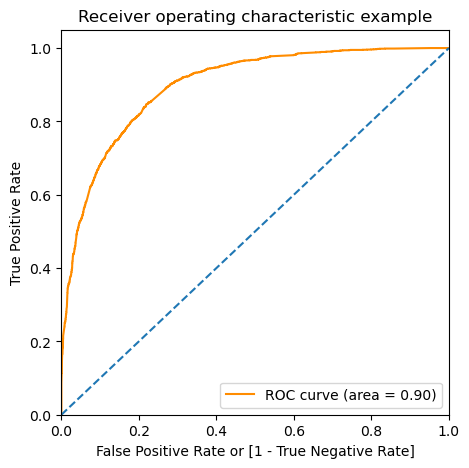

In [205]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conver_Prob)

In [206]:
# Creating columns with different probability cutoff 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conver_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conver_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2294,0,0.038338,2294,0,1,0,0,0,0,0,0,0,0,0
6004,0,0.445180,6004,0,1,1,1,1,1,0,0,0,0,0
8845,0,0.155089,8845,0,1,1,0,0,0,0,0,0,0,0
2218,0,0.144474,2218,0,1,1,0,0,0,0,0,0,0,0
8275,0,0.101130,8275,0,1,1,0,0,0,0,0,0,0,0


In [207]:
# Calculating accuracy sensitivity and specificity

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379183  1.000000  0.000000
0.1   0.1  0.657263  0.977357  0.461756
0.2   0.2  0.768880  0.922828  0.674852
0.3   0.3  0.805502  0.846118  0.780694
0.4   0.4  0.813562  0.772181  0.838837
0.5   0.5  0.817067  0.698244  0.889642
0.6   0.6  0.811460  0.635397  0.918995
0.7   0.7  0.790958  0.530961  0.949760
0.8   0.8  0.767479  0.438540  0.968388
0.9   0.9  0.720694  0.284658  0.987017


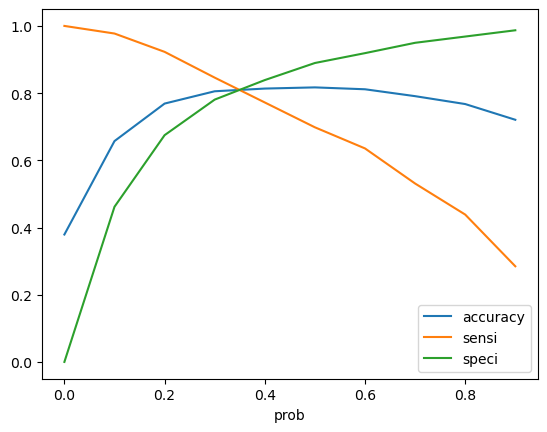

In [208]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [209]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Conver_Prob'].map( lambda x: 1 if x > 0.345 else 0)
y_train_pred_final.head()

,Converted,Conver_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
2294,0,0.038338,2294,0,1,0,0,0,0,0,0,0,0,0,0
6004,0,0.445180,6004,0,1,1,1,1,1,0,0,0,0,0,1
8845,0,0.155089,8845,0,1,1,0,0,0,0,0,0,0,0,0
2218,0,0.144474,2218,0,1,1,0,0,0,0,0,0,0,0,0
8275,0,0.101130,8275,0,1,1,0,0,0,0,0,0,0,0,0


In [210]:
# Rechecking the accuracy 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8088312598563168

In [211]:
# Creating Confusion Matrix for new threshold

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2863,  680],
       [ 411, 1753]], dtype=int64)

In [212]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [213]:

# sensitivity 
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8100739371534196


In [214]:
# specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.808072255151002


In [215]:
# false postive rate 

print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19192774484899802


In [216]:
# Positive predictive value

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7205096588573777


In [217]:
# Negative predictive value

print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8744654856444716


## Precision and recall tradeoff

In [218]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(2294    0
 6004    0
 8845    0
 2218    0
 8275    0
 2951    0
 3986    0
 7470    1
 5738    0
 897     0
 6666    1
 8316    0
 1452    0
 1988    0
 4245    1
 5866    0
 2931    0
 8511    1
 8347    1
 4856    1
 3467    0
 5138    0
 466     1
 685     0
 6432    0
 5975    1
 7071    0
 1449    0
 4313    0
 1742    0
 316     0
 5105    0
 8650    1
 7996    1
 5239    0
 7916    0
 1598    0
 5895    1
 7649    0
 3760    0
 6496    1
 435     0
 4925    1
 6826    1
 4309    0
 3261    1
 9108    0
 6514    0
 401     1
 2590    1
 5176    0
 4422    1
 8352    0
 2831    0
 1753    1
 9055    0
 2456    0
 109     0
 693     1
 643     1
 3171    0
 8670    0
 4499    0
 4852    1
 1293    1
 8095    0
 520     0
 67      1
 3157    0
 3074    1
 3926    1
 6524    0
 5535    0
 8015    0
 2810    0
 7468    0
 2440    1
 5163    0
 7200    0
 4691    0
 4953    0
 2234    0
 8170    0
 1503    0
 5265    0
 3409    0
 956     1
 2586    0
 6955    0
 2116    0
 3612    0

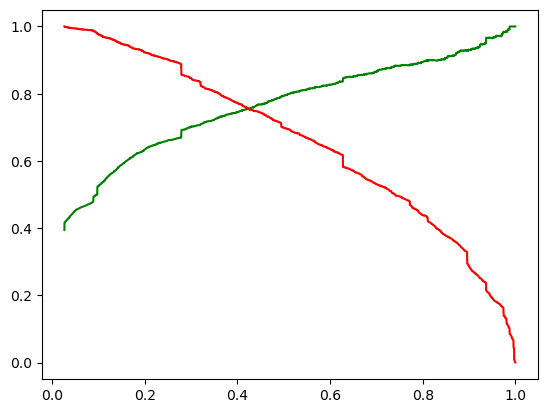

In [219]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conver_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [220]:
# checking the accuracy 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8088312598563168

In [221]:
#  confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2863,  680],
       [ 411, 1753]], dtype=int64)

In [222]:
# evaluating the other metrics 

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [223]:
# Calculate Precision

TP/(TP+FP)

0.7205096588573777

In [224]:
# Calculate Recall

TP/(TP+FN)

0.8100739371534196

### Making Predictions on test set

#### Scaling Test dataset

In [225]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(
    X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Others,What is your current occupation_Working Professional
715,0,0.555556,0.447183,1,0,0,0,0,0,0,0,0,0
6986,0,0.000000,0.000000,0,0,1,0,0,0,1,1,0,0
5126,0,0.222222,0.582746,1,0,0,0,0,0,1,0,0,0
5791,0,0.000000,0.000000,0,1,0,0,0,0,1,0,0,1
6904,0,0.000000,0.000000,0,0,1,0,0,0,0,1,1,0


In [226]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2446, 14)

In [227]:
# making prediction using model 3 
y_test_pred = logm3.predict(X_test_sm)

In [228]:
# top 10 columns
y_test_pred[:10]

715     0.468167
6986    0.627502
5126    0.833616
5791    0.997039
6904    0.097410
6226    0.278566
2053    0.265248
4442    0.973941
8415    0.932332
7292    0.156067
dtype: float64

In [229]:
# Converting y_test_pred to a dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
715,0.468167
6986,0.627502
5126,0.833616
5791,0.997039
6904,0.097410


In [230]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
715,1
6986,1
5126,0
5791,1
6904,0


In [231]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Remove index for both dataframes 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [232]:
# Append y_test_df and y_test_pred

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,715,1,0.468167
1,6986,1,0.627502
2,5126,0,0.833616
3,5791,1,0.997039
4,6904,0,0.097410


In [233]:
# sensitivity-specificity method at 0.345 
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,715,1,0.468167,1
1,6986,1,0.627502,1
2,5126,0,0.833616,1
3,5791,1,0.997039,1
4,6904,0,0.097410,0


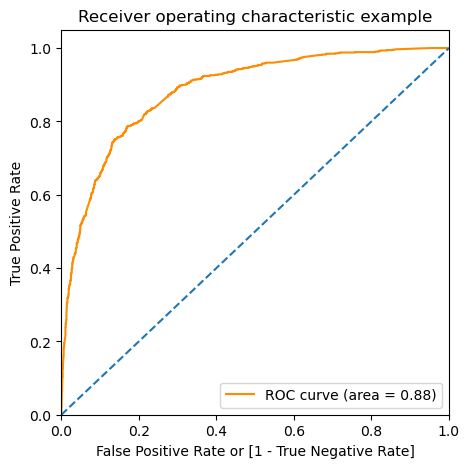

In [234]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

### Test set Model Evaluation

In [235]:
# checking the overall accuracy.

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8066230580539656


In [236]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1254,  287],
       [ 186,  719]], dtype=int64)

In [237]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [238]:
# sensitivity of our model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7944751381215469


In [239]:
# specificity of our model
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8137573004542504


In [240]:
# Calculate Precision

print("Precision :",TP/(TP+FP))

Precision : 0.7147117296222664


In [241]:
# Calculate Recall

print("Recall :",TP/(TP+FN))

Recall : 0.7944751381215469


For Test set

Accuracy : 80.66%

Sensitivity : 79.44%

Specificity : 81.37%

In [242]:
# features and their coefficicent from final model
parameters=logm3.params.sort_values(ascending=False)
parameters

Total Time Spent on Website                             4.465104
Lead Origin_Lead Add Form                               3.766943
Lead Source_Welingak Website                            2.706182
What is your current occupation_Working Professional    2.198346
Lead Source_Olark Chat                                  1.596008
Last Activity_SMS Sent                                  1.473101
TotalVisits                                             1.018292
Last Activity_Others                                    0.769080
Specialization_Others                                  -0.928549
Lead Origin_Landing Page Submission                    -1.070894
What is your current occupation_Others                 -1.274758
Do Not Email                                           -1.364113
Last Activity_Olark Chat Conversation                  -1.376504
const                                                  -1.619045
dtype: float64